# <font color= maroon> Question 1 (5 marks)

### Write a function named palindrome_word(). It takes in a string as the only parameter. It returns True if the string is a palindrome by words. Otherwise, it returns False. A sample run of one possible implementation is shown below.
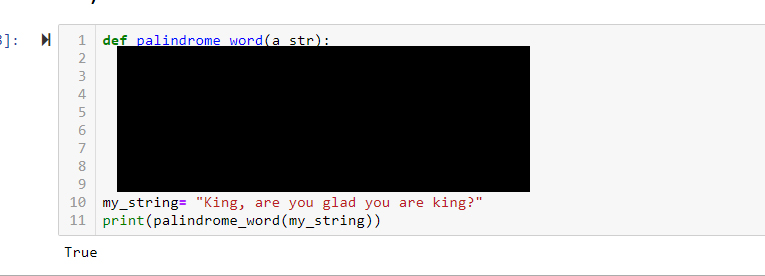

In [36]:
def palindrome_word(a_str):

    stack = "".join([char.lower() for char in a_str if char.isalpha() or char.isspace()]).split(" ")
    # Letters to lowercase for consistent check. Only keep letters and spaces in a_str. Concat a_str, then split using spaces
        
    return stack[::1] == stack[::-1]  # compare normal and reversed to match

my_string = "King, are you glad you are king!"
print(palindrome_word(my_string))

True


# <font color= maroon> Question 2 (20 marks)

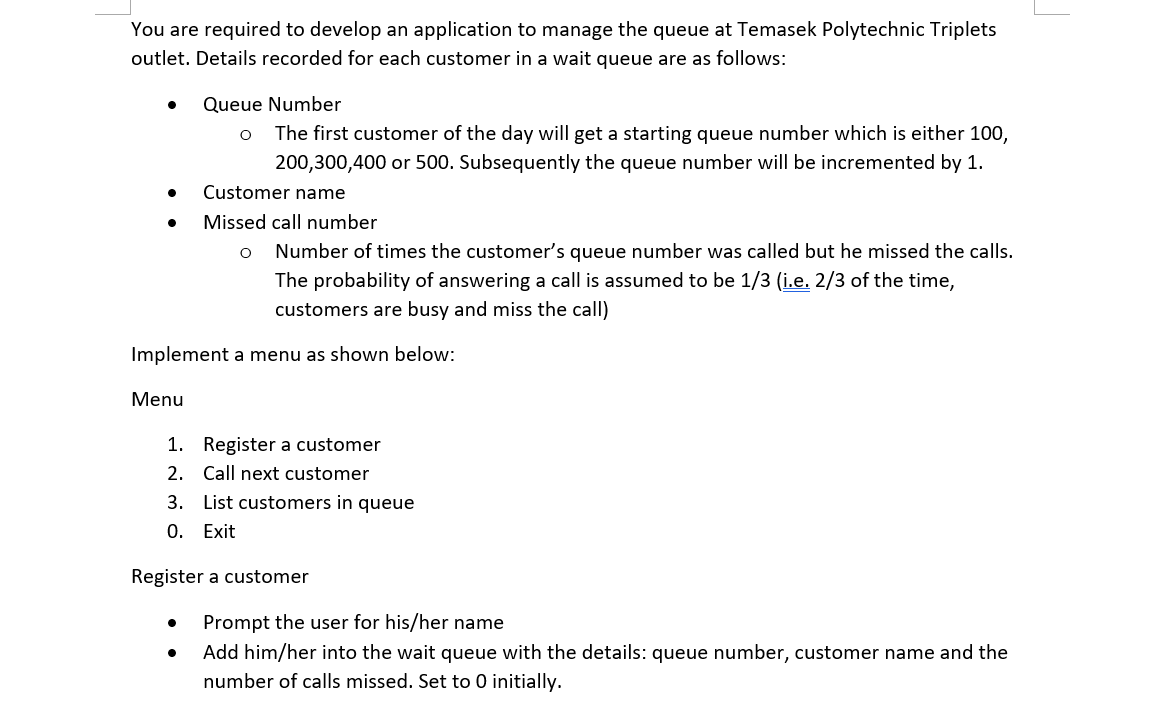
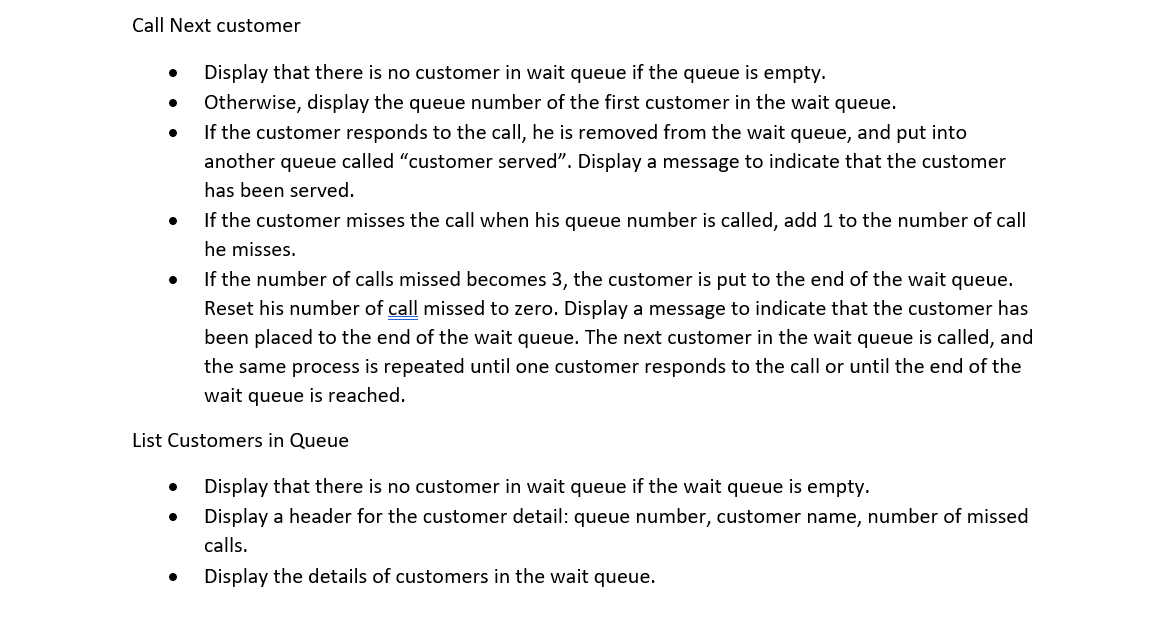

In [37]:
from random import choice                                                 # starting queue number
from time import sleep                                                    # cooldown for calls
from collections import deque                                             # more efficient array for insertion


def register_customer(queue):
    name = input("May I have your Name please: ")
    
    if not queue:
        new_queue = choice([100, 200, 300, 400, 500])                     # no queue, so create a queue number
    else:
        new_queue = max([customer[0] for customer in queue]) + 1          # largest existing queue number + 1

    customer = [new_queue, name, 0]                                       # Queue Number, Customer's Name, Missed calls
    queue.append(customer)


def call_customer(queue, served, start):
    
    if not queue:
        print("Queue empty.")
        return (queue, served)
    
    called_customer = queue.popleft()                                     # pull out (remove) Customer in queue
    
    if start == called_customer:                                          # stop if recalled through queue and no one pick up call
        queue.appendleft(called_customer)                                 # revert queue and return to break
        return (queue, served)
    
    for tries in range(3):                                                # try calling Customer 3 times
        print(f'Calling queue number {called_customer[0]} {called_customer[1]} your waffle is ready!')
        sleep(1)                                                          # cooldown
        
        chance = random.choice([1, 2, 3])
        
        if chance == 1:                                                   # 1/3 chance of Success
            print(f'We have served Queue number {called_customer[0]}')
            served.append(called_customer)
            return (queue, served)
        
        called_customer[2] += 1                                           # increment Missed call
        
    # if Unsuccessful after 3 Tries:
    print(f'Has tried 3 times calling Queue number {called_customer[0]}. Will put {called_customer[1]} behind the queue')
    called_customer[2] = 0                                                # Reset Missed call
    queue.append(called_customer)                                         # add Customer to back of queue
    
    # call next Customer (recursion); 
    # 3rd param returns initial start (if this call is already a recall), 
    # else it starts the recursion by setting Customer as start):
    return call_customer(queue, served, start if start else called_customer)


def list_customers(queue):
    
    if not queue:
        print("There is no customer in the queue")
    else:
        print(f'Queue Number {" " * 6} Customer Name {" " * 6} Number of missed Call')            # header
        
        for customer in queue:
            print(f'{" " * 6} {customer[0]:<12} {customer[1]:<30} {customer[2]}')                 # details


def main():
    queue = deque()
    served = []
    
    menu = ('''
       Menu
        1. Register a customer
        2. Call next customer
        3. List customer in queue
        4. Exit
    ''')
    
    while True:
        print(menu)

        entry = input("Please choose: ")
        if entry == "1":
            register_customer(queue)
        elif entry == "2":
            queue, served = call_customer(queue, served, None)     # Do not give start value, let function assign for Recursion
        elif entry == "3":
            list_customers(queue)
        elif entry == "4":
            break
        else:
            print("Invalid option")
            
    print("End of Program")

main()


       Menu
        1. Register a customer
        2. Call next customer
        3. List customer in queue
        4. Exit
    
Please choose: 1
May I have your Name please: John

       Menu
        1. Register a customer
        2. Call next customer
        3. List customer in queue
        4. Exit
    
Please choose: 1
May I have your Name please: Doe

       Menu
        1. Register a customer
        2. Call next customer
        3. List customer in queue
        4. Exit
    
Please choose: 3
Queue Number        Customer Name        Number of missed Call
       400          John                           0
       401          Doe                            0

       Menu
        1. Register a customer
        2. Call next customer
        3. List customer in queue
        4. Exit
    
Please choose: 2
Calling queue number 400 John your waffle is ready!
Calling queue number 400 John your waffle is ready!
Calling queue number 400 John your waffle is ready!
We have served Queue num

### Please see a sample run of the program here:  [triplets demo](https://studenttpedu-my.sharepoint.com/:v:/g/personal/kokyau_tp_edu_sg/EcTHfrK6VxxCoBAc_Xiu-icB29czBmI_vmFcqwS_2nzRPg?e=jJskFt) 

# <font color= maroon> Question 3 (25 marks)

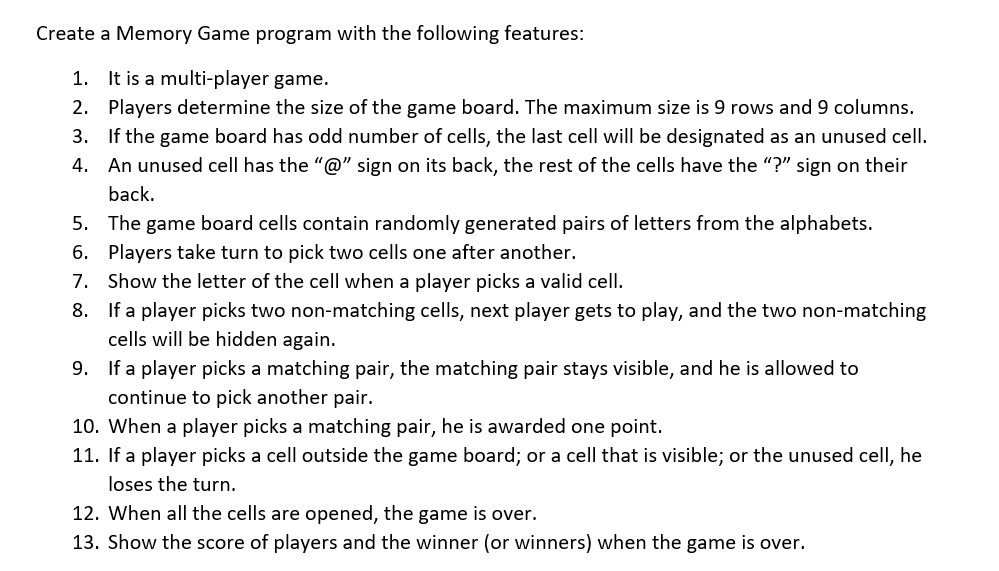

In [10]:
from random import randint, shuffle                         # randint: generate letters for cells; shuffle: randomize cells
from time import sleep                                      # cooldown

def play_game(board_size, player, board, answer, players):
    
    # Check if endgame:
    if board == answer:
        return False                                     
    
    
    # Setup board (init outside so that print_board() doesn't have to calculate everytime):
    rows = board_size // 10
    cols = board_size % 10
    
    
    def print_board():
        print("  " * 17, end="")
        
        for col in range(cols):
            print(col, end=" ")
        print()                                              # print new line

        for row in range(rows):
            print(str(row).rjust(33), end=" ")
            for col in range(cols):
                print(board[row][col], end=" ")
            print()
            
        print()
        sleep(0.5)
        

    def input_pos():
        print(f"Hello {player}!")
        pos = input("Which cell do you want to open? (row,column) ")
        
        try:
            x, y = [int(i) for i in pos]                     # for an Int in pos[i], assign Int to x, then y.
            if board[x][y] == "?":                           # check if slot is available
                return x, y                                  # return pos if that slot is available
            else:
                print("Duplicate Cell: Turn forfeited!")
                return "F", "F"                              # if cell is already open, return False
                
        except:
            print("Invalid Cell: Turn forfeited!")           # when invalid and unknown pos given, return False
            return "F", "F"
        
    
    def open_cell(x, y):                      
        board[x][y] = answer[x][y]                           # reveal board's answer by replace "?" with its answer value
        print_board()
        
            
    # Playing Sequence:
    print_board()
    
    # First Guess:
    x_1, y_1 = input_pos()                                   # prompt for first guess
    if x_1 == "F":                                           # if False is returned, return to stop turn
        return (board, answer, players)
    else:
        open_cell(x_1, y_1)                                  # else, reveal the answer for pos given
        
    # Second Guess:
    x_2, y_2 = input_pos()                                   # prompt for second guess
    if x_2 == "F":
        board[x_1][y_1] = "?"                                # if False pos, revert the previous board reveal to hide back
        return (board, answer, players)                      # before return to stop turn
    else:
        open_cell(x_2, y_2)
    
    
    # Check if Guesses match:
    if (answer[x_1][y_1] == answer[x_2][y_2]):            
        players[player] += 1                                                  # add 1 point to player who made the guesses
        print("Good Job!")
        play_game(board_size, player, board, answer, players)                 # recall this function to repeat player's turn
    else:
        board[x_1][y_1], board[x_2][y_2] = "?", "?"                           # hide the revealed cards
        print(f"Sorry {player} please try again when it is your turn")

    return (board, answer, players)                                           # return the data to be reused again


        
def main():
    print(f"{'Welcome to my Memory Game':>50}")
    
    while True:
        board_size = int(input("Please provide the size of game board (e.g. 23 for 2 rows 3 columns): "))
            
        if board_size > 99:
            print("Invalid size (Limit is 9 rows 9 columns)")   
        elif board_size < 12:
            print("Invalid size (2 digits are required)")
        else:
            break            # board specs passes requirements, hence stop loop and continue
            

    # init board:
    rows = board_size // 10
    cols = board_size % 10
    count = rows * cols
    
    letters = "ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz"
    pairs = []
    
        
    # generate board:
    while len(pairs) < (count // 2):
        randIndex = randint(0, len(letters) - 1)                            # randomly select an index within letters
        if letters[randIndex] not in pairs:                                 # ensure every letter pair is unique
            pairs.append(letters[randIndex]) 
        
    pairs = pairs * 2                                                       # duplicate to create pair
    shuffle(pairs)
    
    board = [["?" for col in range(cols)] for row in range(rows)]                              # append ? for each card in board
    answer = [[pairs[(r * cols + c) % len(pairs)] for c in range(cols)] for r in range(rows)]  # append a letter to each card for board's answer
    
    if ((rows * cols) % 2 == 1):                                            # if odd number of tiles
        board[-1][-1], answer[-1][-1] = "@", "@"                            # fill up bottom last tile with '@'
        
        
    # getting player names:
    while True:
        player_names = input("This is a multiplayer game, please provide name of player (seperated by comma): ")
        names = player_names.split(',')
        
        if len(names) == len(set(names)):   
            # set only allows unique values, duplicates will be removed and condition would not meet.
            break
        else:
            print("Error: Duplicate player names detected. Please enter unique names for each player.")

    # Add player names and scores to the dictionary + print Player names
    print("The players are:")
    players = dict()
    
    for name in names:
        print(name)
        players[name] = 0    # set score (value of dict) of Players to 0
        
    
    # Start game:
    turn = 0                 # start with 1st Player
    print(" "*30, "Are you ready to start the Game?")
    sleep(2)
    
    # While game is ongoing:
    while True:
        playing = names[turn]
        progress = play_game(board_size, playing, board, answer, players)
        
        # when gameover:
        if progress == False:
            print("Game Over")
            print("Name: " + " " * 10 + " number of correct match")

            for key, value in players.items():
                print(f"{key:<24} {value}")

            # for player with value == MAX/highest score, append to winners:
            winners = [player for player, value in players.items() if value == max(players.values())]
            print(f"Winner(s): {', '.join(winners)}")
            break                                                    # stop game
            
        # Next player's turn:
        turn = (turn + 1) % len(names)                               # modulo will reset counter to 0 after a full cycle
        
main()

                         Welcome to my Memory Game
Please provide the size of game board (e.g. 23 for 2 rows 3 columns): 33
This is a multiplayer game, please provide name of player (seperated by comma): John,Leong,Joe
The players are:
John
Leong
Joe
                               Are you ready to start the Game?
                                  0 1 2 
                                0 ? ? ? 
                                1 ? ? ? 
                                2 ? ? @ 

Hello John!
Which cell do you want to open? (row,column) 00
                                  0 1 2 
                                0 b ? ? 
                                1 ? ? ? 
                                2 ? ? @ 

Hello John!
Which cell do you want to open? (row,column) 00
Duplicate Cell: Turn forfeited!
                                  0 1 2 
                                0 ? ? ? 
                                1 ? ? ? 
                                2 ? ? @ 

Hello Leong!
Which cell do you want to

### Please see a sample run of the program here:  [Memory game demo](https://studenttpedu-my.sharepoint.com/:v:/g/personal/kokyau_tp_edu_sg/EVxgOCw3UUdFuPMGHbfnADgBycYSK-yJV3dF7ZsDwCI-1w?e=orStlw) 

### The marking scheme is as shown below:
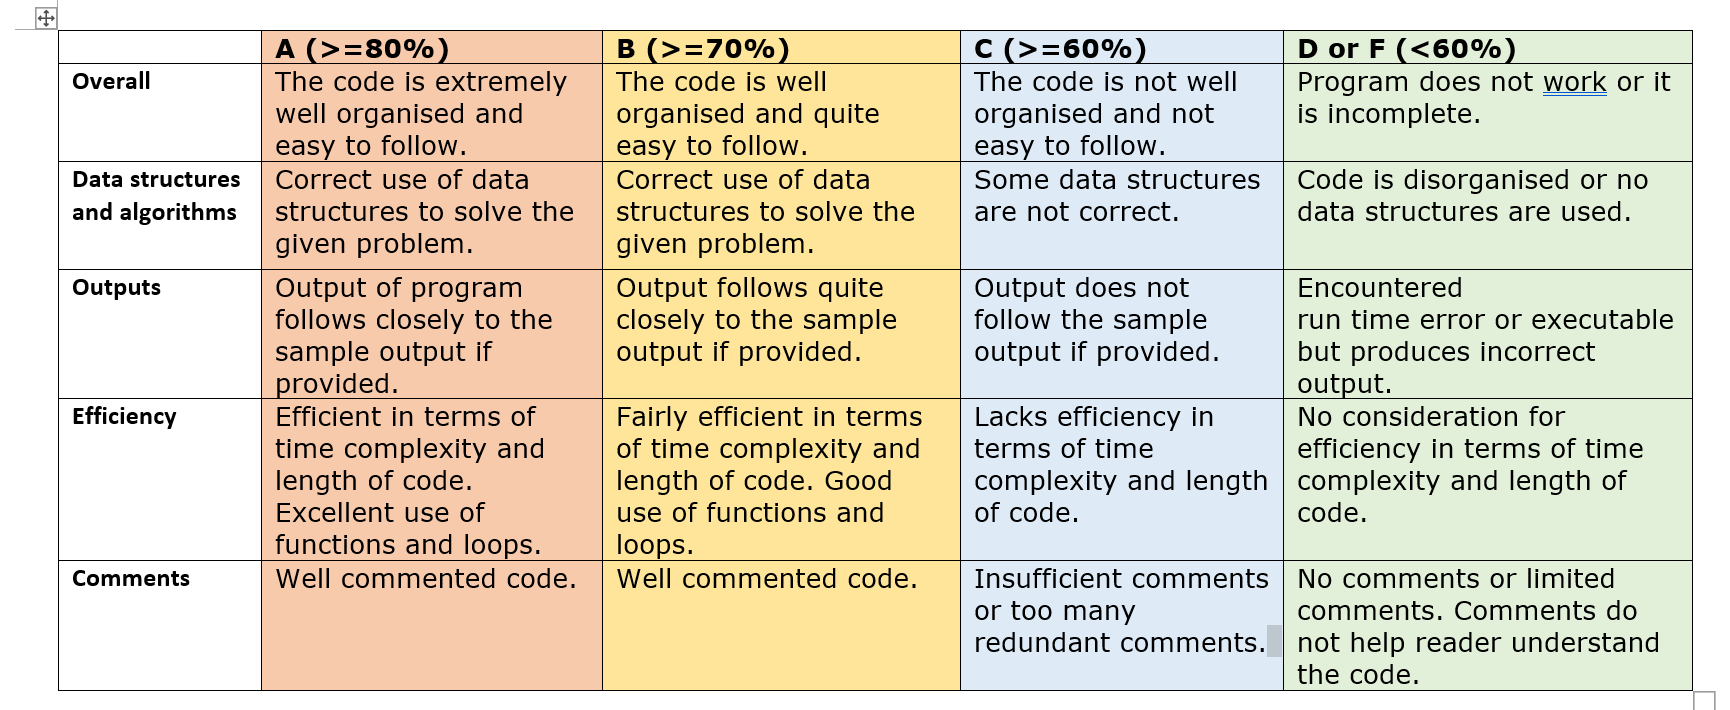